# Motion activities detection

The goal is to detect motion activities. See the lab description for more information.

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load the data

In [2]:
def read_data(path: Path) -> pd.DataFrame:
    """
    Read the CSVs from the given path.
    
    Set a multiindex with the record number and the timestamp.
    
    Parameters
    ----------
    path : Path
        Path containing the CSV files.
    
    Returns
    -------
    pd.DataFrame
        DataFrame with all the CSVs.
    """
    return pd.concat([
        (pd.read_csv(p, index_col=False)
         .assign(record=i)
         .rename(columns={'Timestamp (ms)': 'ts', 'X: (m/s^2)': 'x', 'Y: (m/s^2)': 'y', 'Z: (m/s^2)': 'z'})
         .set_index(['record', 'ts'])
         .assign(norm=lambda x: np.linalg.norm(x.values, axis=1))
         ) for i, p in enumerate(path)])

In [3]:
# Get all the csv from the folders and load them in DataFrames.
data_path = Path('data')
jump_paths = list((data_path / 'jump').glob('*.csv'))
rest_paths = list((data_path / 'rest').glob('*.csv'))
walk_paths = list((data_path / 'walk').glob('*.csv'))

In [4]:
jumps = read_data(jump_paths)
rests = read_data(rest_paths)
walks = read_data(walk_paths)

In [5]:
jumps

x         y         z       norm
record ts                                             
0      41084  -1.754002 -9.674527  2.029186  10.039452
       41163  -1.739644 -9.641026  2.045936  10.008077
       41242  -1.737251 -9.660170  2.017221  10.020285
       41321  -1.701358 -9.679314  1.955006  10.020269
       41400  -1.730072 -9.674527  1.983721  10.026204
...                 ...       ...       ...        ...
4      362500  9.810924  1.206026  0.701122   9.909606
       362505  9.449594  1.284992  0.940413   9.582818
       362510  9.059550  1.318492  1.139024   9.225575
       362514  8.676684  1.373529  1.249098   8.873087
       362518  8.375178  1.356779  1.462067   8.609419

[100437 rows x 4 columns]

## Visualization of the norm of the accelerations

In [6]:
def plot_data(df: pd.DataFrame, col: str = 'norm', title: str = 'Plot of norm') -> plt.axes:
    """
    Plot the given column of the DataFrame.
    """
    ax = df[col].plot(figsize=(15, 8))
    ax.set_title(title, fontsize=14)
    # Style.
    # Remove border on the top and right.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Set alpha on remaining borders.
    ax.spines['left'].set_alpha(0.4)
    ax.spines['bottom'].set_alpha(0.4)

    # Only show ticks on the left and bottom spines
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    # Style of ticks.
    plt.xticks(fontsize=10, alpha=0.7)
    plt.yticks(fontsize=10, alpha=0.7)
    
    return ax

<AxesSubplot:title={'center':'Norm of acceleration when jumping'}, xlabel='record,ts'>

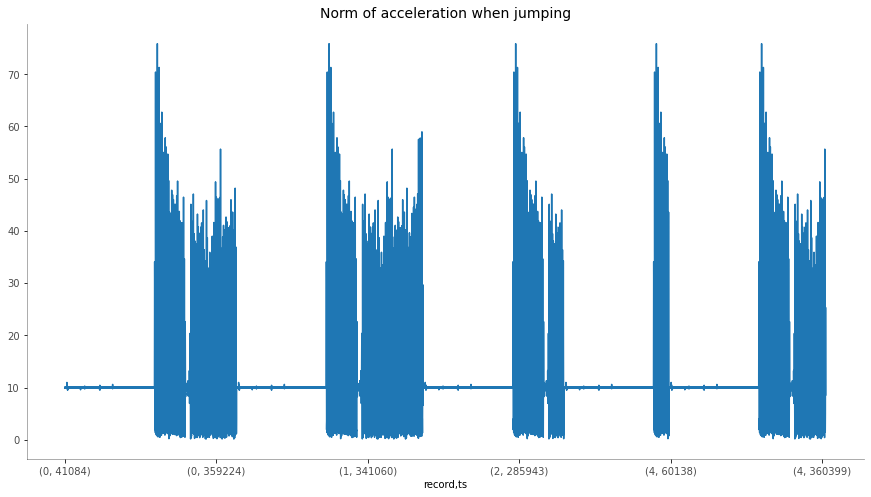

In [7]:
plot_data(jumps, title='Norm of acceleration when jumping')

<AxesSubplot:title={'center':'Norm of acceleration when resting'}, xlabel='record,ts'>

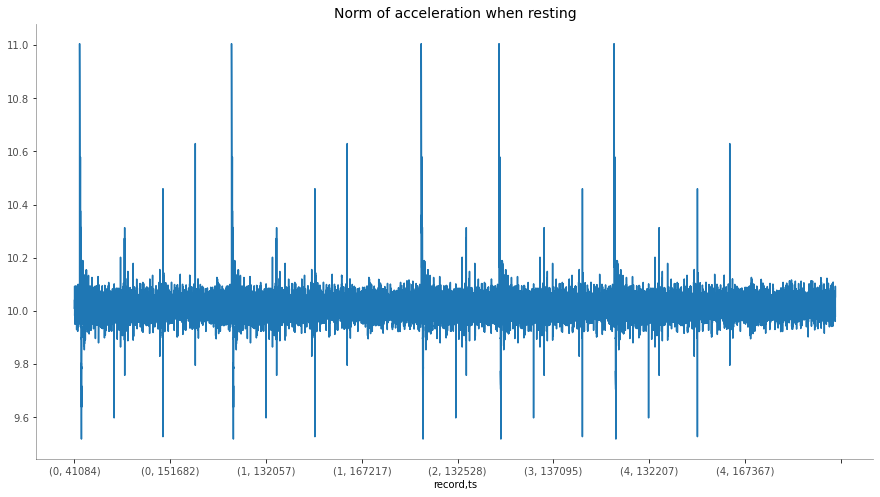

In [8]:
plot_data(rests, title='Norm of acceleration when resting')

<AxesSubplot:title={'center':'Norm of acceleration when walking'}, xlabel='record,ts'>

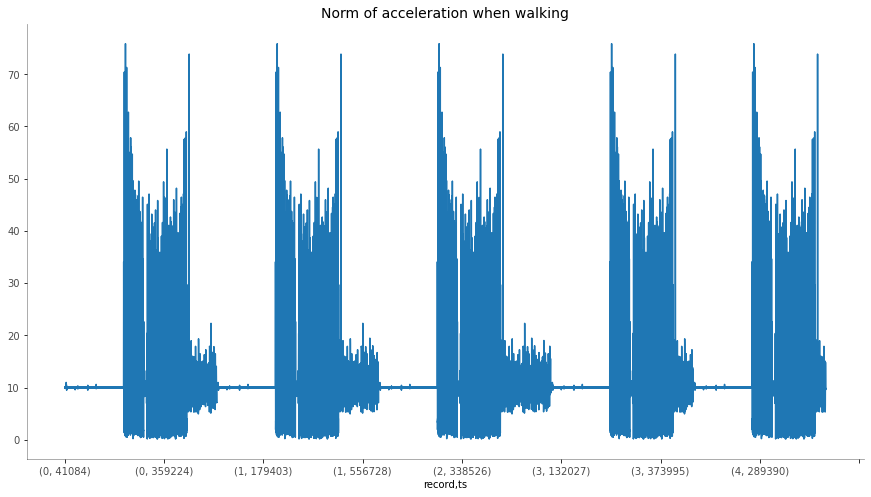

In [71]:
plot_data(walks, title='Norm of acceleration when walking')

## Activities detection

### Questions

#### 1) What characteristics of the MoseSense sensor are important to know when performing a recording ? What are the "by default" settings you are using right now ?

The others examples use the linear acceleration to represent movement. It's the best option

#### 2) How noisy is the data captured by the MoveSense sensor ?

#### 3) How variable are the recordings you made for a given activity ? How variable is the feature you computed to characterize a given activity ?

#### 4) Is it always possible to differentiate various activities by computing a feature of the corresponding data ? If not, why not combining multiple features (e.g., median, range, standard deviation) and defining a rule (or a set of rules) based on them ?

#### 5) What other features can be computed to characterize a set of measurements like the ones captured using the MoveSense during a particular activity ?

#### 6) For a cyclic activity like walking, can you identify a periodic pattern in the data ?

#### 7) Did you observe that the sensor has to be worn in the same way during an experiment ? (e.g., you cannot turn it upside down for instance ?) why ? by the way, did you notice the sensing of the acceleration caused by gravity and how it perturbs your data ?

In [78]:
# TODO